In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import string
import re

In [2]:
dataset = pd.read_csv('Datasets/EDOS 1M.csv')

classes = np.sort(dataset["eb+_emot"].unique())
classes

array(['acknowledging', 'afraid', 'agreeing', 'angry', 'annoyed',
       'anticipating', 'anxious', 'apprehensive', 'ashamed', 'caring',
       'confident', 'consoling', 'content', 'devastated', 'disappointed',
       'disgusted', 'embarrassed', 'encouraging', 'excited', 'faithful',
       'furious', 'grateful', 'guilty', 'hopeful', 'impressed', 'jealous',
       'joyful', 'lonely', 'neutral', 'nostalgic', 'prepared', 'proud',
       'questioning', 'sad', 'sentimental', 'suggesting', 'surprised',
       'sympathizing', 'terrified', 'trusting', 'wishing'], dtype=object)

In [3]:
dataset.head()

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187


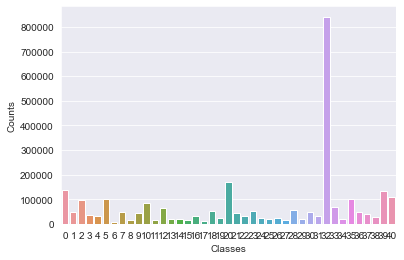

In [4]:
# plot classes distribution
counts = pd.get_dummies(dataset["eb+_emot"]).sum()

plt.ylabel('Counts')
plt.xlabel('Classes')
sns.barplot(x = [i for i in range(len(classes))], y = counts)
plt.show()

In [5]:
doc = ", ".join(dataset["uttr"])

In [6]:
print(doc[:1000])

You moron ! What fool washes diapers by the well !, You useless fool !, How dare you sleep !, Up ! Go and clean the house ., Clean the kitchen ., I cleaned the kitchen , ma 'am ., Your name means to trust . It also means truth . And endurance . Or it could be god ., You were given a great name . You 'd better live up to it ., I 'll go home in the spring once the snow melts ., Listen . No matter how tough it gets I wouldn 't bring shame to you and your dad . I promise I won 't ., Your medicine . Open your mouth ., Granny ..., Don 't spill it ., Granny !, Oshin ., Brandon said he 's headed down to Galway ., Craking , Galway , it 's the same thing . He 's really heading down there ..., Hi there , Welcome to the Stockroom ., I don 't really work here . I 've never even been to a store like this ., Don 't get me wrong . I 'm not a prude . I like sex ., Shut up bitch ! Show us the butt plugs . Butt plugs . Aisle three I think ., Sorry , Shengqi . My Dad 's present is more important than your

In [8]:
words = doc.split()

In [9]:
len(words)

39469825

In [10]:
lowercase_doc = doc.lower()
words = lowercase_doc.split()
vocab = set(words)

In [11]:
len(vocab)

277024

In [12]:
regex = '[' + string.punctuation + ']'
doc2_nopunctuation = re.sub(regex,'',lowercase_doc)
print(doc2_nopunctuation[:1000])

you moron  what fool washes diapers by the well  you useless fool  how dare you sleep  up  go and clean the house  clean the kitchen  i cleaned the kitchen  ma am  your name means to trust  it also means truth  and endurance  or it could be god  you were given a great name  you d better live up to it  i ll go home in the spring once the snow melts  listen  no matter how tough it gets i wouldn t bring shame to you and your dad  i promise i won t  your medicine  open your mouth  granny  don t spill it  granny  oshin  brandon said he s headed down to galway  craking  galway  it s the same thing  he s really heading down there  hi there  welcome to the stockroom  i don t really work here  i ve never even been to a store like this  don t get me wrong  i m not a prude  i like sex  shut up bitch  show us the butt plugs  butt plugs  aisle three i think  sorry  shengqi  my dad s present is more important than your pretend promise to your imaginary daughter  she s real  everything i ve told you 

In [13]:
words = doc2_nopunctuation.lower().split()
sorted_vocab = sorted(set(words))

In [14]:
# 20 most common word
counts = nltk.Counter(words)
counts.most_common(20)

[('you', 1534393),
 ('i', 1204942),
 ('the', 917180),
 ('to', 749409),
 ('s', 621568),
 ('it', 587412),
 ('a', 579725),
 ('t', 434283),
 ('that', 395960),
 ('and', 363961),
 ('is', 356225),
 ('what', 352648),
 ('of', 342576),
 ('me', 325439),
 ('we', 303621),
 ('in', 298627),
 ('this', 268911),
 ('are', 244647),
 ('for', 241906),
 ('do', 235273)]

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords = set(stopwords.words('english'))
counts_nostopwords = FreqDist(w for w in words if w not in stopwords)
most_common_words = counts_nostopwords.most_common(20)

In [17]:
#20 most common words excluding stop-words
print(most_common_words)

[('know', 166768), ('get', 141445), ('go', 128540), ('like', 127309), ('come', 112337), ('right', 110645), ('want', 100195), ('one', 93542), ('good', 90990), ('see', 87898), ('think', 85531), ('got', 82247), ('well', 81755), ('going', 76447), ('let', 75508), ('yes', 74771), ('yeah', 69091), ('back', 67175), ('take', 66526), ('us', 66092)]


In [18]:
average_conversation_length = dataset.groupby('dialogue_id').count().mean()['uttr']
min_conversation_length = dataset.groupby('dialogue_id').count().min()['uttr']
max_conversation_length = dataset.groupby('dialogue_id').count().max()['uttr']

In [19]:
print('average_conversation_length: ', average_conversation_length)
print('min_conversation_length: ', min_conversation_length)
print('max_conversation_length: ', max_conversation_length)

average_conversation_length:  2.829426
min_conversation_length:  2
max_conversation_length:  14
